**Task-04**

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.



In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from textblob import TextBlob

In [ ]:
# Load the dataset
data = pd.read_csv('/content/task 04_dataset.csv')

In [ ]:
# Display the first few rows of the dataset
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
# Define column names
col_names = ['ID', 'Entity', 'Sentiment', 'Content']

In [ ]:
# Read the dataset with specified column names
df = pd.read_csv('/content/task 04_dataset.csv', names=col_names)

In [ ]:
# Display the first few rows of the DataFrame with defined column names
df.head()


,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# Check the shape of the DataFrame
df_shape = df.shape
print("DataFrame shape:", df_shape)

DataFrame shape: (68432, 4)


In [ ]:
# Display summary statistics of the DataFrame
df_description = df.describe()
print("DataFrame description:", df_description)

DataFrame description:                  ID
count  68432.000000
mean    6250.292407
std     3760.727632
min        1.000000
25%     2930.000000
50%     6161.000000
75%     9463.000000
max    13200.000000


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:", missing_values)

Missing values: ID             0
Entity         0
Sentiment      0
Content      602
dtype: int64


In [ ]:
# Drop rows with missing values
df.dropna(axis=0, inplace=True)

In [ ]:
# Check for missing values after dropping
missing_values_after_drop = df.isnull().sum()
print("Missing values after dropping:", missing_values_after_drop)

Missing values after dropping: ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64


In [ ]:
# Check for and remove duplicate rows
duplicate_count_before = df.duplicated().sum()
print("Duplicate rows before removal:", duplicate_count_before)

Duplicate rows before removal: 2174


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
duplicate_count_after = df.duplicated().sum()
print("Duplicate rows after removal:", duplicate_count_after)

Duplicate rows after removal: 0


In [ ]:
# Check the shape of the DataFrame after cleaning
cleaned_df_shape = df.shape
print("DataFrame shape after cleaning:", cleaned_df_shape)

DataFrame shape after cleaning: (65656, 4)


In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()



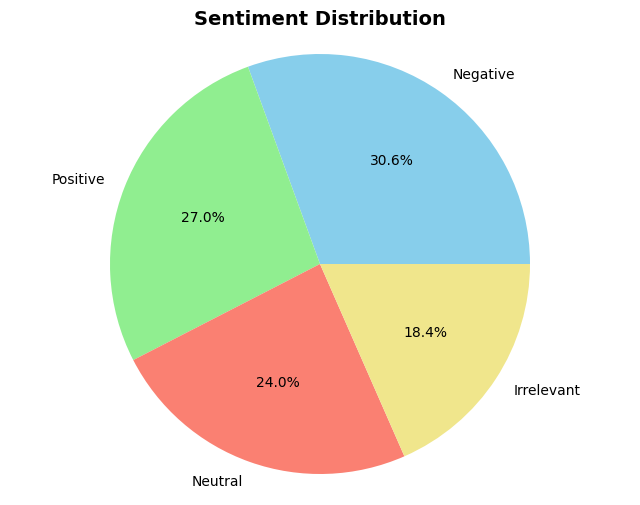

In [ ]:
# Plotting a pie chart for sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon','khaki'])
plt.title('Sentiment Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

Each section of the pie corresponds to a sentiment category, displaying the proportion of occurrences represented as percentages. The chart offers a concise overview of the distribution of positive, negative, and neutral sentiments within the data.

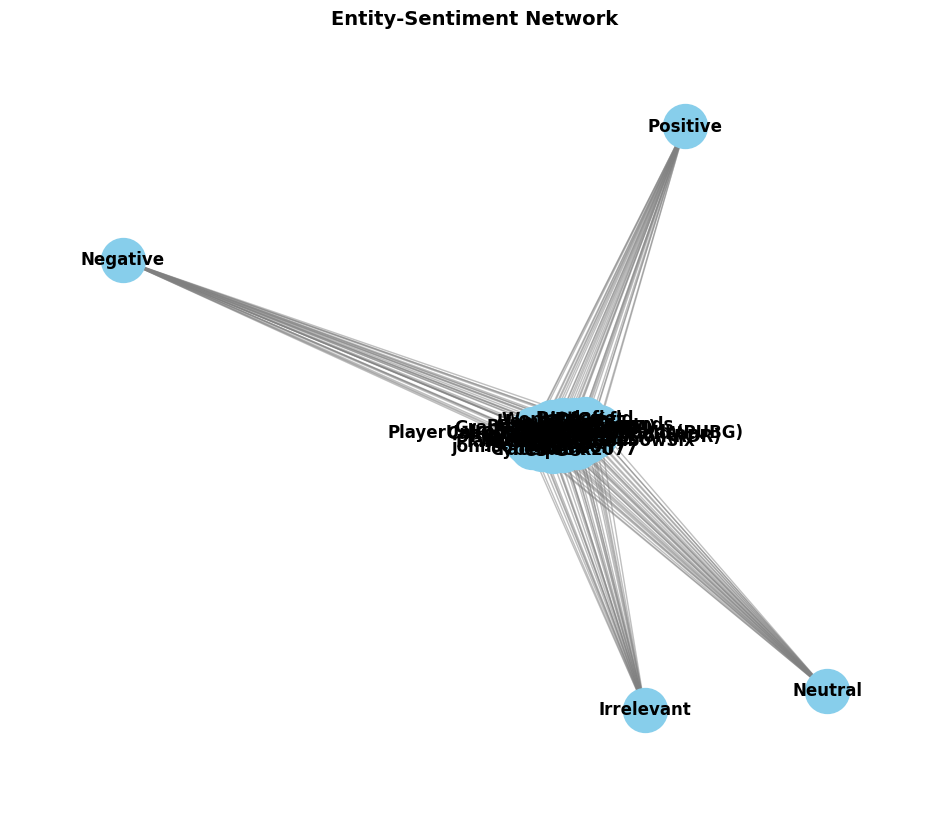

In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges between entities and sentiments
for index, row in df.iterrows():
    entity = row['Entity']
    sentiment = row['Sentiment']
    G.add_edge(entity, sentiment)

# Plot the network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Positions for all nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', font_weight='bold', font_color='black')
plt.title('Entity-Sentiment Network', fontsize=14, fontweight='bold')
plt.margins(0.1, 0.1)
plt.axis('off')
plt.show()


This is a  visual representation of a network, where entities and sentiments are nodes, and their relationships are depicted as directed edges. Each entity is connected to its corresponding sentiment(s), forming a network structure.

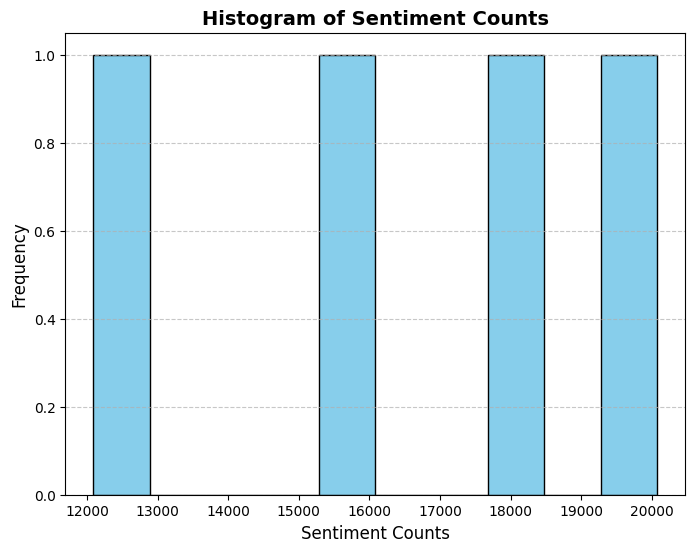

In [ ]:
# Plotting a histogram for sentiment counts
plt.figure(figsize=(8, 6))
plt.hist(sentiment_counts, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentiment Counts', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Counts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Each sentiment count is grouped into bins, and the height of each bar represents the frequency of occurrences for sentiments falling within that count range. The histogram provides a visual summary of the distribution of sentiment counts, helping to understand the overall sentiment distribution in the data.

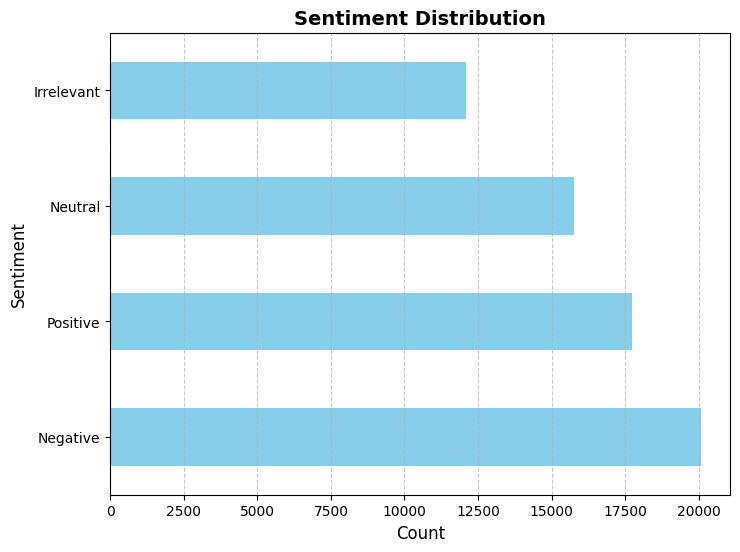

In [ ]:
# Plotting a horizontal bar chart for sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='barh', color='skyblue')
plt.title('Sentiment Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Sentiment', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


 Each sentiment category is represented by a bar, with its length corresponding to the count of occurrences. The chart provides a clear visual representation of the frequency of each sentiment

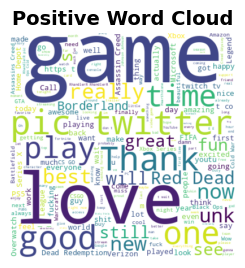

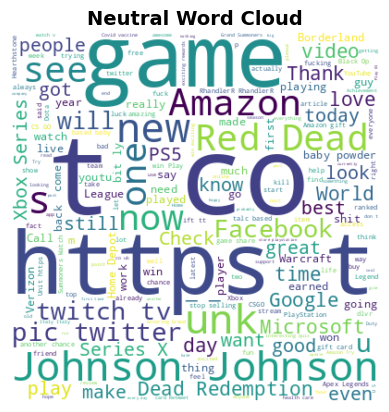

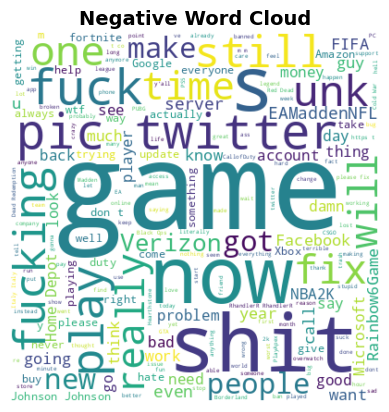

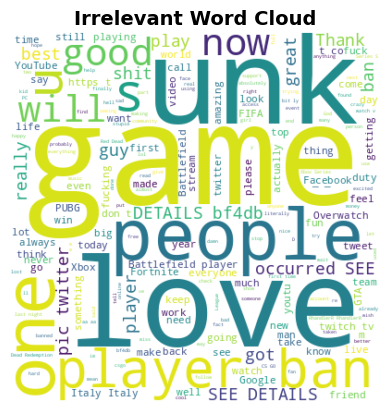

In [ ]:
from wordcloud import WordCloud
sentiments = df['Sentiment'].unique()
plt.subplot(1, 2, 2)
for sentiment in sentiments:
    text = ' '.join(df[df['Sentiment'] == sentiment]['Content'])
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(sentiment + ' Word Cloud', fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()

Each word cloud visually depicts the most common words associated with a particular sentiment, with word size indicating frequency. By presenting word clouds for different sentiments, it offers a visual representation of the prominent words and themes associated with each sentiment category, facilitating easy interpretation of sentiment-related text data.







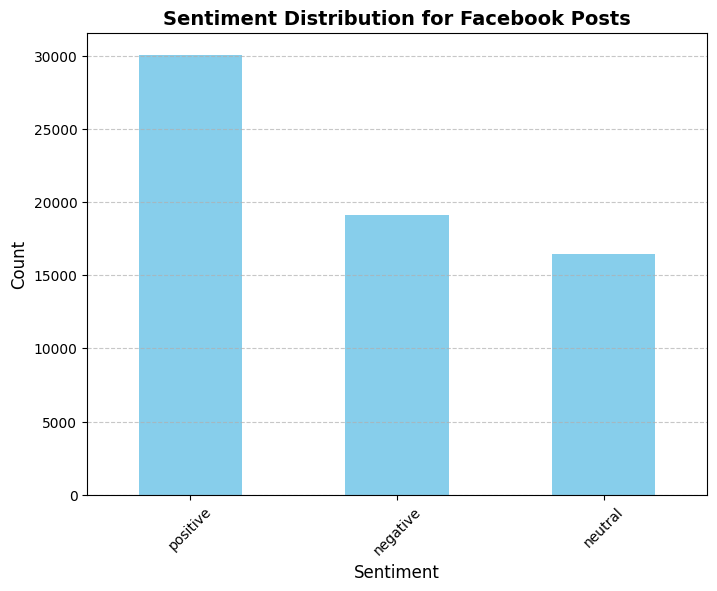

In [ ]:
# Perform sentiment analysis (Example using TextBlob)
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each post content
df['Sentiment'] = df['Content'].apply(get_sentiment)

# Count the occurrences of each sentiment after sentiment analysis
sentiment_counts = df['Sentiment'].value_counts()

# Plot the sentiment counts after sentiment analysis
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution for Facebook Posts', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
